<h1>Logistic Regression</h1>
<p> Basically similar to Linear Regression but with different cost function and hypothesis.</p>

- [Locally Weighted & Logistic Regression | Stanford CS229: Machine Learning - Lecture 3 (Autumn 2018)](https://www.youtube.com/watch?v=het9HFqo1TQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3&pp=iAQB)
---

In [32]:
from matplotlib import pyplot as plt
import pandas as pd
import math
import numpy as np

In [33]:
#Util functions
def dotProduct(x, y):
    temp = None
    if(len(x)==len(y)):
        temp = 0
        n = len(x)

        for i in range(n):
            temp+= x[i] * y[i]

    if(temp == None):
        print(x,y)
    return temp

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [34]:
#Data prep
data = [(1,-100),(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(0,7),(0,8),(0,9),(0,10),(0,11),(0,12),(0,100)]
data = np.array(data)
data

array([[   1, -100],
       [   1,    1],
       [   1,    2],
       [   1,    3],
       [   1,    4],
       [   1,    5],
       [   1,    6],
       [   0,    7],
       [   0,    8],
       [   0,    9],
       [   0,   10],
       [   0,   11],
       [   0,   12],
       [   0,  100]])

In [35]:
#Global variables
x, y = [], []
for i in range(len(data)):
    x.append(data[i][1:])
    y.append(data[i][0])
    # data[i][0] = labels[data[i][0]]
x = np.array(x)
y = np.array(y)

N=2

learning_rate = 0.001   


print("learning_rate:", learning_rate)

learning_rate: 0.001


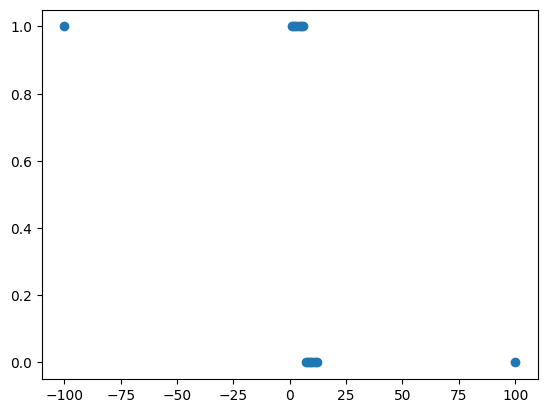

In [36]:
# Visualizing
plt.scatter(x,y)

In [37]:
#Augmenting data
n = len(x)
aug_x=[]
index = 0
while index<n:
    aug_x.append([1] + list(x[index]))
    index+=1

aug_x = np.array(aug_x)
aug_x

array([[   1, -100],
       [   1,    1],
       [   1,    2],
       [   1,    3],
       [   1,    4],
       [   1,    5],
       [   1,    6],
       [   1,    7],
       [   1,    8],
       [   1,    9],
       [   1,   10],
       [   1,   11],
       [   1,   12],
       [   1,  100]])

In [38]:
#Hypothesis and fitting
def h(thetas, x):
    val = sigmoid(np.dot(thetas, x))
    return val

def fit(thetas, lr, x, y):
    for j in range(len(thetas)):
        val = 0
        for i in range(len(x)):
            val+=x[i][j] * (y[i] - h(thetas,x[i]))
        thetas[j] = thetas[j] + lr * val
        
    loss = 0
    for i in range(len(x)):
        val = h(thetas,x[i])
        loss+= math.log(pow(val, y[i]), math.e)+math.log(pow(1-val,1-y[i]), math.e)

    return loss

In [39]:
#Train
thetas=[]

#With b
for i in range(N):
    thetas.append(0) 

for epoch in range(100000):
    val = fit(thetas, learning_rate, aug_x, y)
    if((epoch+1)%10==0):
        print(epoch+1,"\t Loss:",val)

print(thetas)

10 	 Loss: -7.2262448886839765
20 	 Loss: -7.1793327535614075
30 	 Loss: -7.133014837108143
40 	 Loss: -7.087249366290233
50 	 Loss: -7.042029586905308
60 	 Loss: -6.997349651577254
70 	 Loss: -6.9532033324436355
80 	 Loss: -6.909584276205007
90 	 Loss: -6.866486119297061
100 	 Loss: -6.823902522163044
110 	 Loss: -6.78182717854274
120 	 Loss: -6.740253818089031
130 	 Loss: -6.699176207467795
140 	 Loss: -6.658588151279819
150 	 Loss: -6.618483493096844
160 	 Loss: -6.578856116633066
170 	 Loss: -6.53969994701365
180 	 Loss: -6.501008952096787
190 	 Loss: -6.462777143813122
200 	 Loss: -6.424998579495065
210 	 Loss: -6.387667363175608
220 	 Loss: -6.35077764684199
230 	 Loss: -6.314323631633848
240 	 Loss: -6.27829956897875
250 	 Loss: -6.242699761660356
260 	 Loss: -6.207518564816424
270 	 Loss: -6.172750386865097
280 	 Loss: -6.138389690359049
290 	 Loss: -6.1044309927677745
300 	 Loss: -6.07086886718894
310 	 Loss: -6.0376979429900866
320 	 Loss: -6.004912906382329
330 	 Loss: -5.97

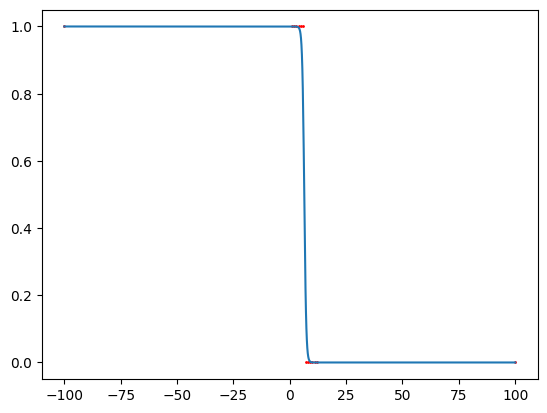

In [40]:
#results
pred=[]

x_s = np.linspace(-100, 100, 1001)

n = len(x_s)
aug_x_s=[]
index = 0
while index<n:
    aug_x_s.append([1, x_s[index]])
    index+=1


for i in range(len(x_s)):
    pred.append(h(thetas, aug_x_s[i]))

# plt.scatter(pred, price)
plt.plot(x_s, pred)
plt.scatter(x, y,c="r",s=1)

Coefficients: 
 [7.7457035] [[-1.19163408]]


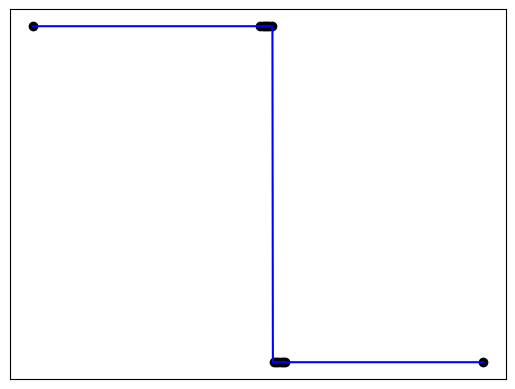

In [41]:
# Scikit comparison
# https://www.sharpsightlabs.com/blog/sklearn-logistic-regression/#sklearn-logisticregression-examples
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()
regr.fit(x, y)

# Make predictions using the testing set
pred = regr.predict(x_s.reshape(-1,1))

# The coefficients
print("Coefficients: \n", regr.intercept_ ,regr.coef_)

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x_s, pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()
